In [137]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


 ### Importing Cleaned dataset

In [166]:
data = pd.read_csv('Crime_against_women_final.csv')
data.head()

,sr_no,state_ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


## Exploratory Data Analysis (EDA):

### In this part of work, we are going to find patterns, relations,and anomalies in the dataset.

In [167]:
data.shape

(10186, 11)

In [168]:
data.keys()

Index(['sr_no', 'state_ut', 'district', 'year', 'rape',
       'kidnapping_and_abduction', 'dowry_deaths', 'assault_on_women',
       'insult_to_modesty', 'cruelty_by_husband_or_relatives',
       'importation_of_girls'],
      dtype='object')

In [169]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10186 entries, 0 to 10185
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   sr_no                            10186 non-null  int64 
 1   state_ut                         10186 non-null  object
 2   district                         10186 non-null  object
 3   year                             10186 non-null  int64 
 4   rape                             10186 non-null  int64 
 5   kidnapping_and_abduction         10186 non-null  int64 
 6   dowry_deaths                     10186 non-null  int64 
 7   assault_on_women                 10186 non-null  int64 
 8   insult_to_modesty                10186 non-null  int64 
 9   cruelty_by_husband_or_relatives  10186 non-null  int64 
 10  importation_of_girls             10186 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 875.5+ KB


In [170]:
# statistics description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sr_no,10186.0,3870.217357,2817.921207,0.0,1004.25,3680.5,6348.75,9015.0
year,10186.0,2007.706853,4.047104,2001.0,2004.00,2008.0,2011.00,2014.0
rape,10186.0,30.392598,34.421687,0.0,8.00,21.0,42.00,607.0
kidnapping_and_abduction,10186.0,36.628608,53.621047,0.0,6.00,19.0,46.00,688.0
dowry_deaths,10186.0,10.577263,14.305337,0.0,1.00,5.0,15.00,178.0
assault_on_women,10186.0,59.506087,77.529300,0.0,10.00,32.0,79.00,1626.0
insult_to_modesty,10186.0,14.370509,44.299678,0.0,0.00,1.0,11.00,1257.0
cruelty_by_husband_or_relatives,10186.0,109.654820,193.378706,0.0,11.00,49.0,134.00,3504.0
importation_of_girls,10186.0,0.091891,1.323404,0.0,0.00,0.0,0.00,60.0


In [171]:
# count the nber of state
states= data['state_ut'].unique()
count_states = len(states)
print(states)
print(f'The total number of states/ut after removing duplicate is: {count_states}')

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTRAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'DELHI UT' 'TELANGANA']
The total number of states/ut after removing duplicate is: 37


In [172]:
# checking missing values
print(data.isnull().sum())
print('\n The total number of missed values is: ',data.isnull().sum().sum() )

sr_no                              0
state_ut                           0
district                           0
year                               0
rape                               0
kidnapping_and_abduction           0
dowry_deaths                       0
assault_on_women                   0
insult_to_modesty                  0
cruelty_by_husband_or_relatives    0
importation_of_girls               0
dtype: int64

 The total number of missed values is:  0


<AxesSubplot:>

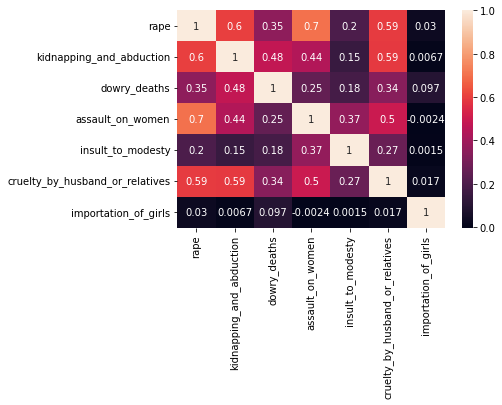

In [173]:
datac=data.drop(['sr_no','state_ut','district','year'],axis=1)
correlation=datac.corr()
sns.heatmap(correlation,annot=True)

## From correlation heatmap, it can be observed that for various districts as cases of one type of violence goes up, it is highly likely that other forms will also go up.

In [174]:
Rape=data['rape'].sum()
Kidnap_abduction=data['kidnapping_and_abduction'].sum()
Dowry_deaths=data['dowry_deaths'].sum()
Assault=data['assault_on_women'].sum()
Insult=data['insult_to_modesty'].sum()
Domestic_cruelty=data['cruelty_by_husband_or_relatives'].sum()
Importation=data['importation_of_girls'].sum()

In [175]:
Rape, Kidnap_abduction, Dowry_deaths, Assault, Insult, Domestic_cruelty, Importation

(309579, 373099, 107740, 606129, 146378, 1116944, 936)

In [176]:
ways= ["Rape", "Kidnap", "Dowry","Assault","Insult","Cruelty","Importation"]
Sumofcases=[Rape,Kidnap_abduction,Dowry_deaths,Assault,Insult,Domestic_cruelty,Importation]

### Comparing count of incidences of various forms of violence against women from 2001-2014

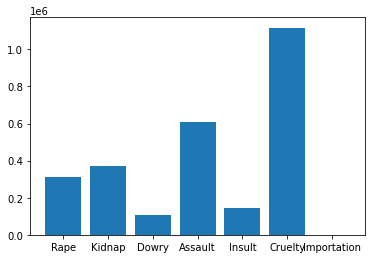

In [177]:
plot1=plt.bar(ways,Sumofcases,width=.8)


## Over a million cases of cruelty and half million cases of assault have been reported in just 14 years.

### Comparing number of reported rape cases by year

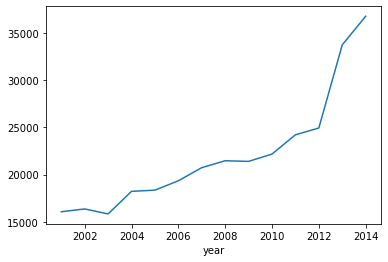

In [178]:
df2=data.groupby('year')['rape'].sum().plot(kind="line")

## Number of rape cases have shown an increasing trend over the years.

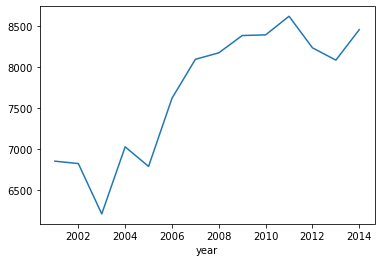

In [179]:
df3=data.groupby('year')['dowry_deaths'].sum().plot(kind="line")

## Number of dowry deaths, there is no decline in number of dowry deaths.

In [180]:
total_acts=data["rape"]+data["kidnapping_and_abduction"]+data["dowry_deaths"]+data["assault_on_women"]+data["insult_to_modesty"]+data["cruelty_by_husband_or_relatives"]+data["importation_of_girls"]

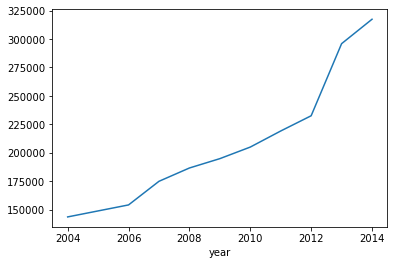

In [181]:
data['total_cases']=total_acts
df7=data.groupby('year')['total_cases'].sum().nlargest(10).plot(kind="line")

## The aggregate cases of violence against women have been consistently rising throughout years.  This is happening despite improvements in literacy rates and policies introduced by government.

In [182]:
df= data[data.year == 2014]

In [183]:
dfs= df.sort_values(by = "rape", axis = 0)

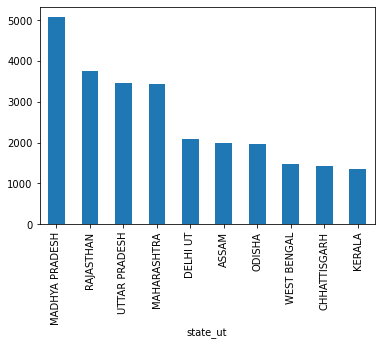

In [184]:
df2=dfs.groupby('state_ut')['rape'].sum().nlargest(10).plot(kind="bar")


## Top 10 states with most number of rapes in 2014

In [185]:
df4=df.loc[data['state_ut'] == "MADHYA PRADESH"]

In [186]:
df4.head()


,sr_no,state_ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls,total_cases
9721,349,MADHYA PRADESH,AGAR,2014,28,12,2,56,8,44,0,150
9722,350,MADHYA PRADESH,ALIRAJPUR,2014,17,15,0,15,0,10,0,57
9723,351,MADHYA PRADESH,ANUPPUR,2014,70,83,7,121,0,114,0,395
9724,352,MADHYA PRADESH,ASHOK NAGAR,2014,76,38,12,171,1,82,0,380
9725,353,MADHYA PRADESH,BALAGHAT,2014,131,155,12,178,3,107,0,586


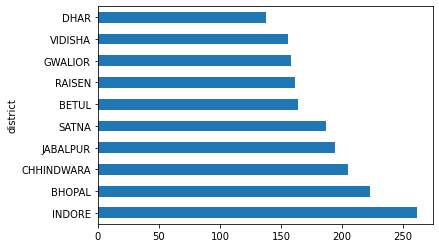

In [187]:
df5=df4.groupby('district')['rape'].sum().nlargest(10).plot(kind="barh")

## Top districts in Madhya Pradesh that reported high rape cases.

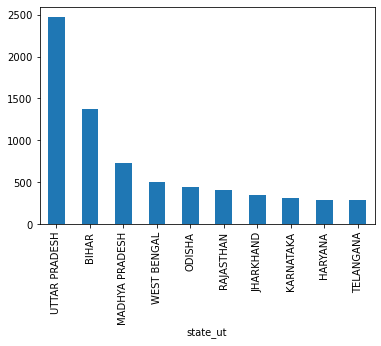

In [188]:
df3=dfs.groupby('state_ut')['dowry_deaths'].sum().nlargest(10).plot(kind="bar")


## Top 10 states with maximum dowry deaths. Bihar and Uttar Pradesh have reported very high numbers.

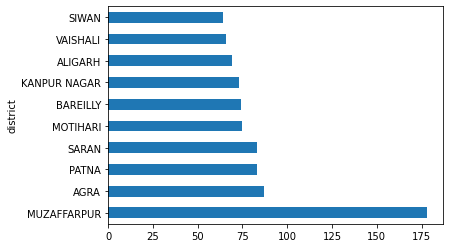

In [189]:
state_list = ['BIHAR','UTTAR PRADESH']
filtered_df = df[df['state_ut'].isin(state_list)]
df6=filtered_df.groupby('district')['dowry_deaths'].sum().nlargest(10).plot(kind="barh")

## Top 10 districts in Bihar and Uttar Pradesh that have unusually high rate of dowry deaths.

In [190]:
total_acts=data["rape"]+data["kidnapping_and_abduction"]+data["dowry_deaths"]+data["assault_on_women"]+data["insult_to_modesty"]+data["cruelty_by_husband_or_relatives"]+data["importation_of_girls"]

In [191]:
data['total_cases']=total_acts

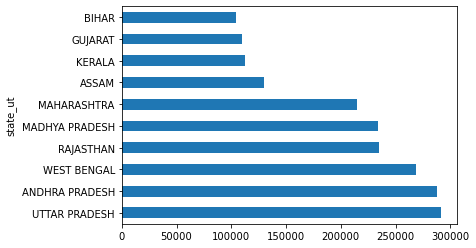

In [192]:
df7=data.groupby('state_ut')['total_cases'].sum().nlargest(10).plot(kind="barh")

## Conclusion: From EDA, it is clear that the incidences of violence against women have been increasing. States like Madhya Pradesh, Uttar Pradesh and Bihar have deep rooted record of practicing such evil acts. It is also observed that with increase in one form of violence there is postive relation that the other forms are also practiced.

## Above mentioned states are mostly poor and have low literacy rates. It is essential to generate social awareness as well as focus on economic development of such states.